In [39]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/water-potability/water_potability.csv


# **IMPORTING LIBRARIES**

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
import seaborn as sns


from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [41]:
import plotly.express          as ex
import plotly.graph_objs       as go
from sklearn import preprocessing

**READING AND DISPLAYING THE DATASET**

In [42]:
data=pd.read_csv('../input/water-potability/water_potability.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


# DATASET PREPROCESSING: Statistical Imputation thru Median

1. Checking for null values in the dataset

In [44]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

2. Percentage of null values in each parameter

In [45]:
for col in data.columns:
    p=(data[col].isnull().sum()/len(data))*100
    print('the column {0} have {1} percent of NAN values'.format(col,p.round(2)))
    print()

the column ph have 14.99 percent of NAN values

the column Hardness have 0.0 percent of NAN values

the column Solids have 0.0 percent of NAN values

the column Chloramines have 0.0 percent of NAN values

the column Sulfate have 23.84 percent of NAN values

the column Conductivity have 0.0 percent of NAN values

the column Organic_carbon have 0.0 percent of NAN values

the column Trihalomethanes have 4.95 percent of NAN values

the column Turbidity have 0.0 percent of NAN values

the column Potability have 0.0 percent of NAN values



Null values are found on the dataset.Thus, the **Median column value** is then used to fill the empty values.

In [46]:
data["ph"].fillna(value = data["ph"].median(), inplace = True)
data["Sulfate"].fillna(value = data["Sulfate"].median(), inplace = True)
data["Trihalomethanes"].fillna(value = data["Trihalomethanes"].median(), inplace = True)

2.1. Check if there are still null values after statistical imputation

In [47]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [48]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.074194,196.369496,22014.092526,7.122277,333.608364,426.205111,14.284970,66.407478,3.966786,0.390110
std,1.470040,32.879761,8768.570828,1.583085,36.143851,80.824064,3.308162,15.769958,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


3. K-d

In [50]:
X = data.drop('Potability', axis=1)
y = data['Potability']
X__train, X__test_, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k = 20
kfold = KFold(n_splits=k, shuffle=True, random_state=42)

scaler = StandardScaler()
accuracy_scores = []

for train_index, test_index in kfold.split(X):
  X__train, X__test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

X_train = scaler.fit_transform(X__train)
X_test = scaler.transform(X__test)

In [51]:
train_data,test_data=train_test_split(data,test_size=0.2,random_state=42)

**DATA VISUALIZATION**

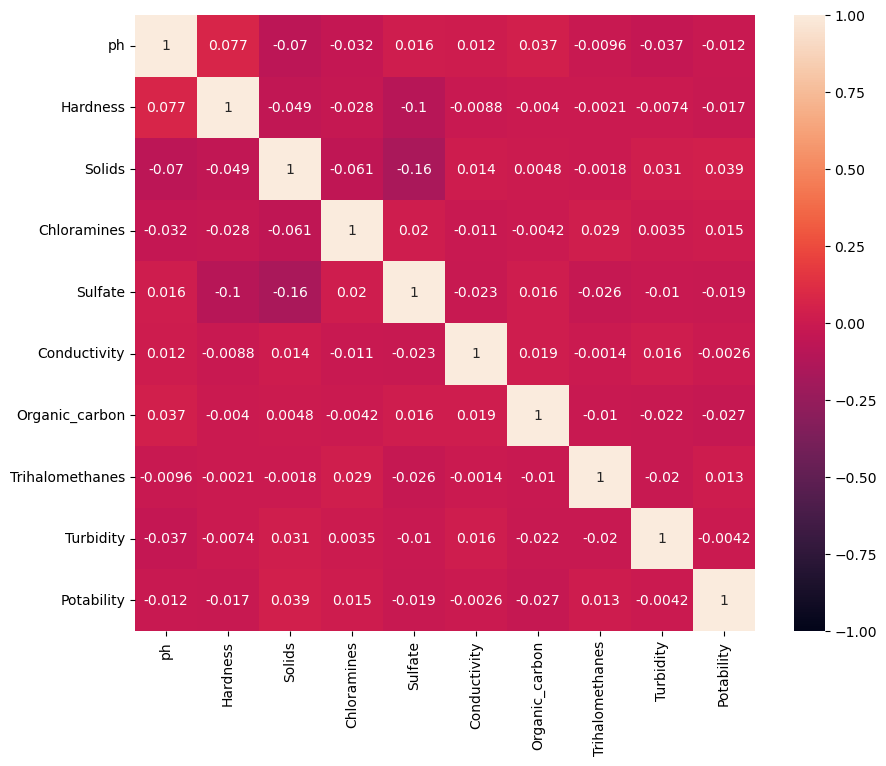

In [52]:
plt.figure(figsize=(10,8))
sns.heatmap(train_data.corr(),annot=True,vmin=-1)
plt.show()

In [53]:
T = data.copy()
T.Potability =  T.Potability.map({1:'Potable',0:'Not Potable'})
ex.pie(T,names='Potability',title='Distribution of Target Labels (Drinkability)')

<Figure size 1800x1500 with 0 Axes>

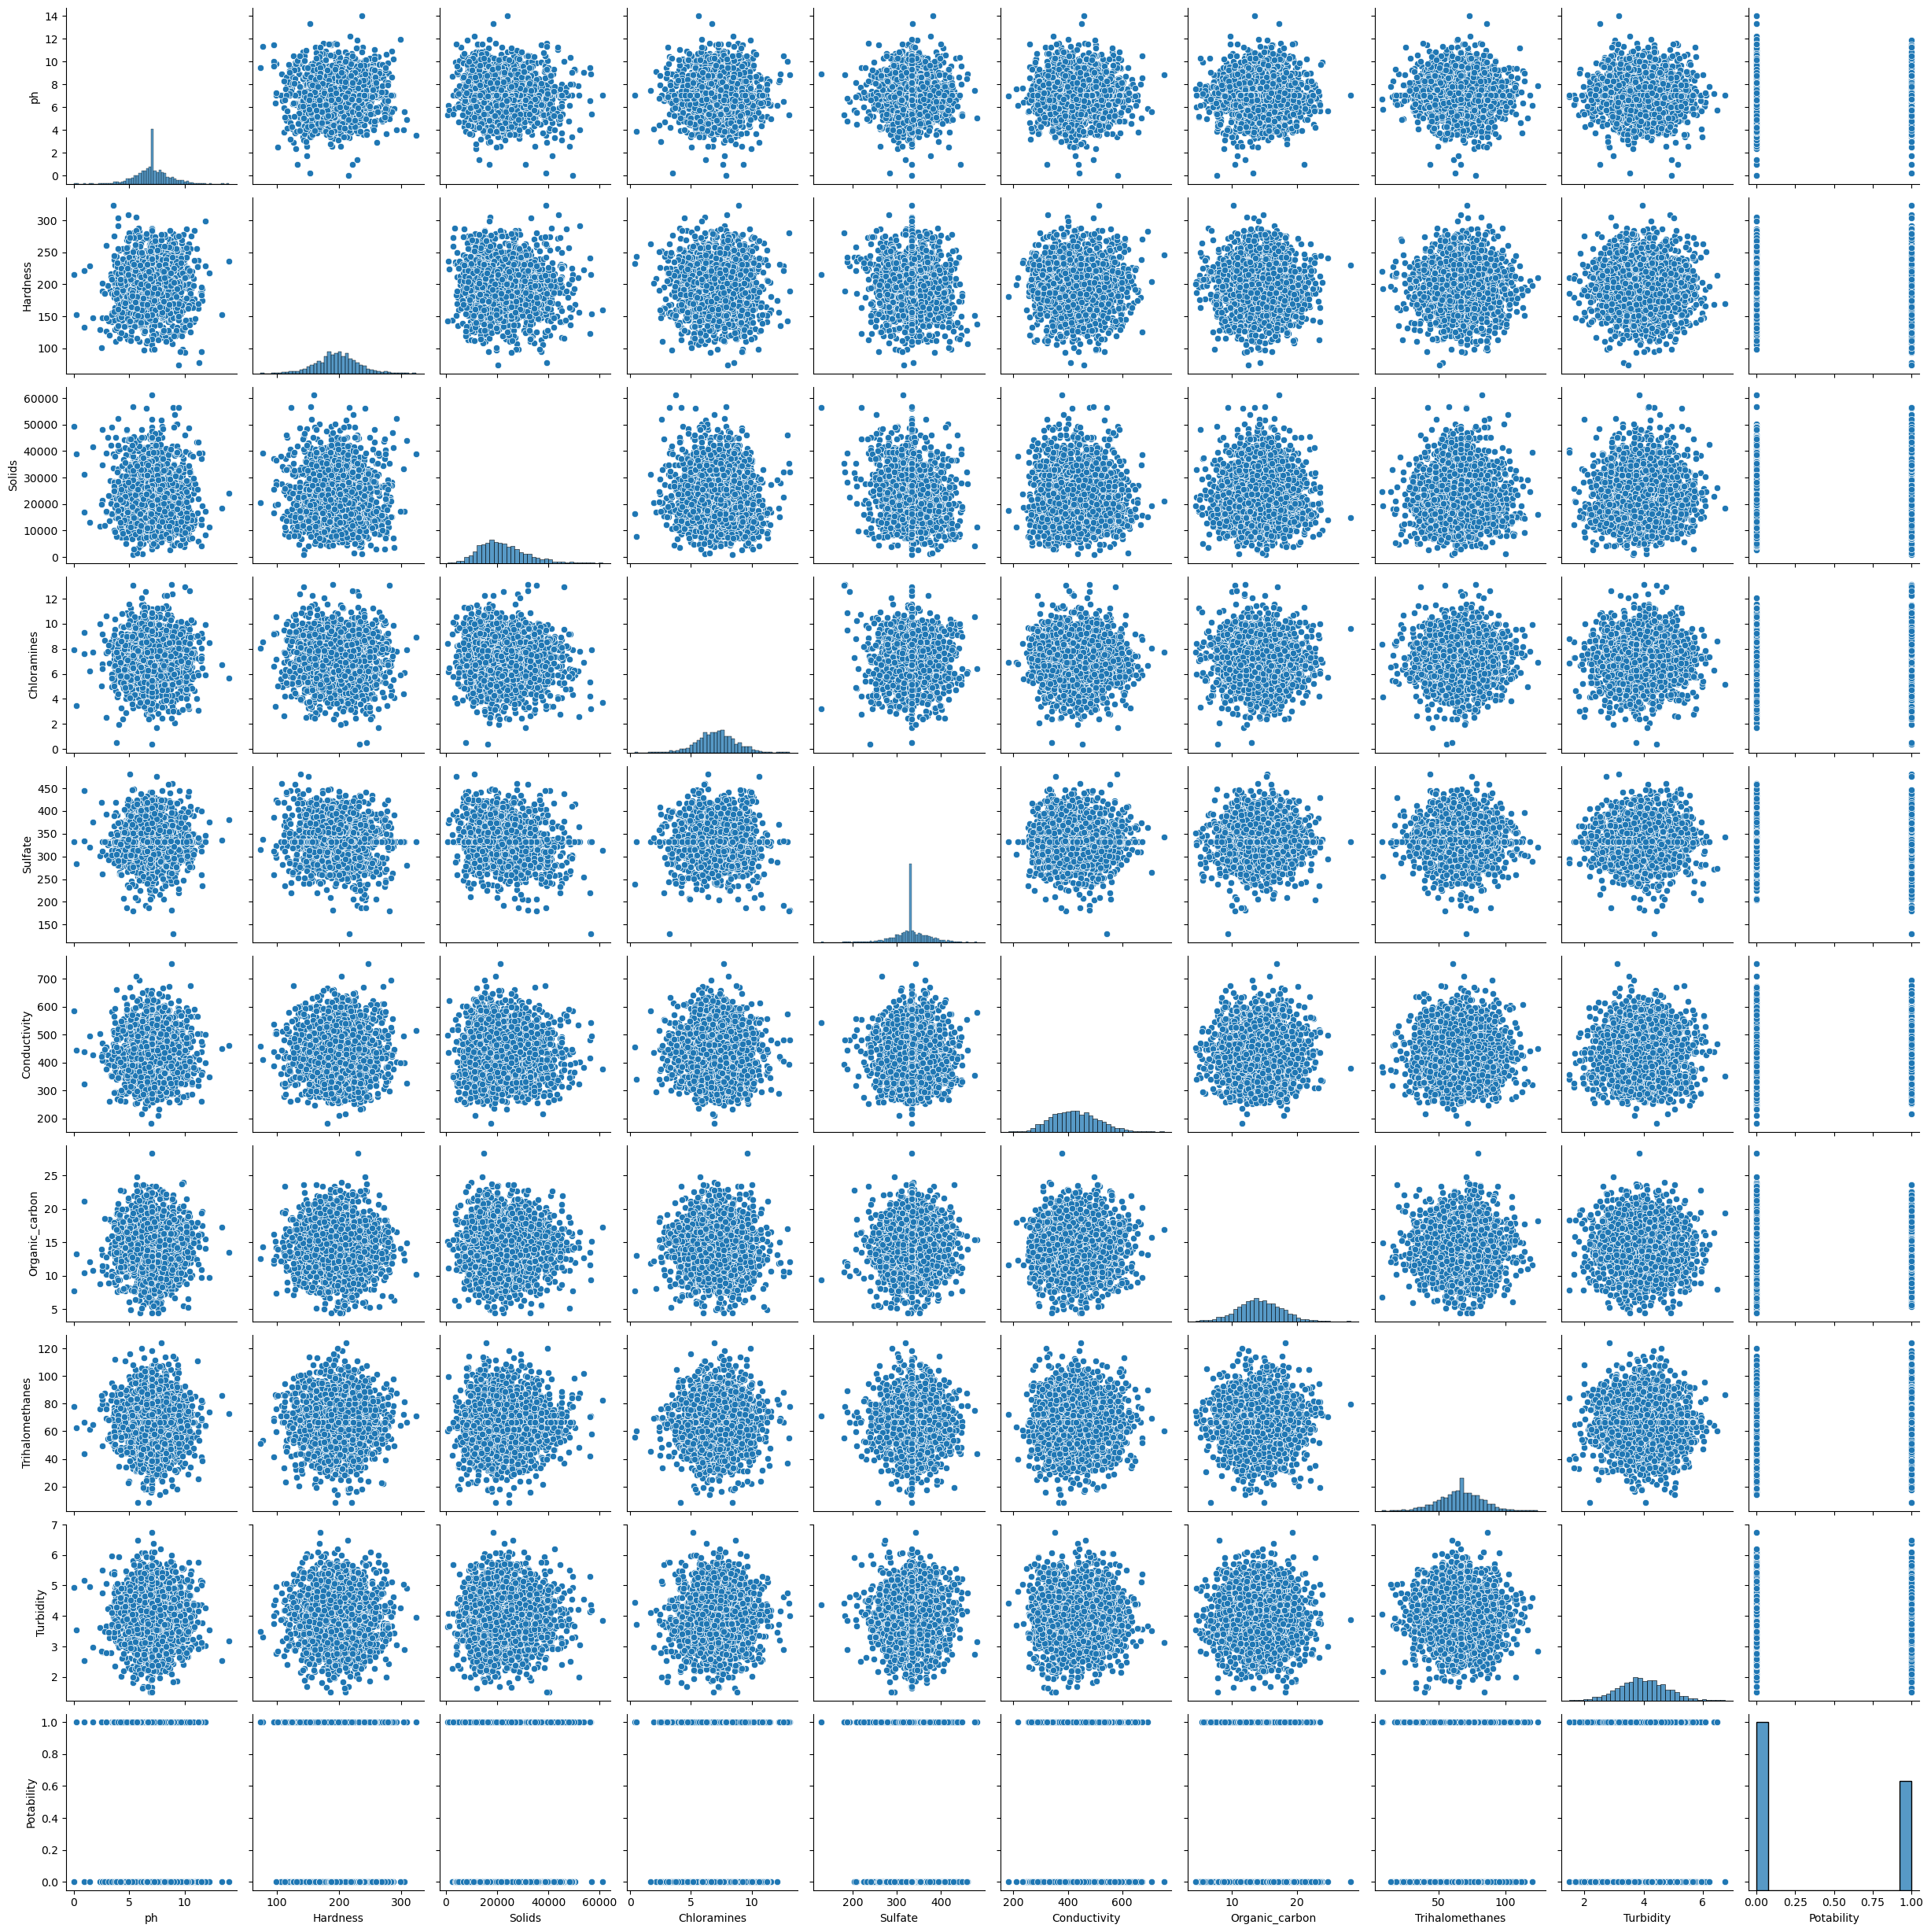

In [54]:
plt.figure(figsize=(18,15))
sns.pairplot(train_data)
plt.show()

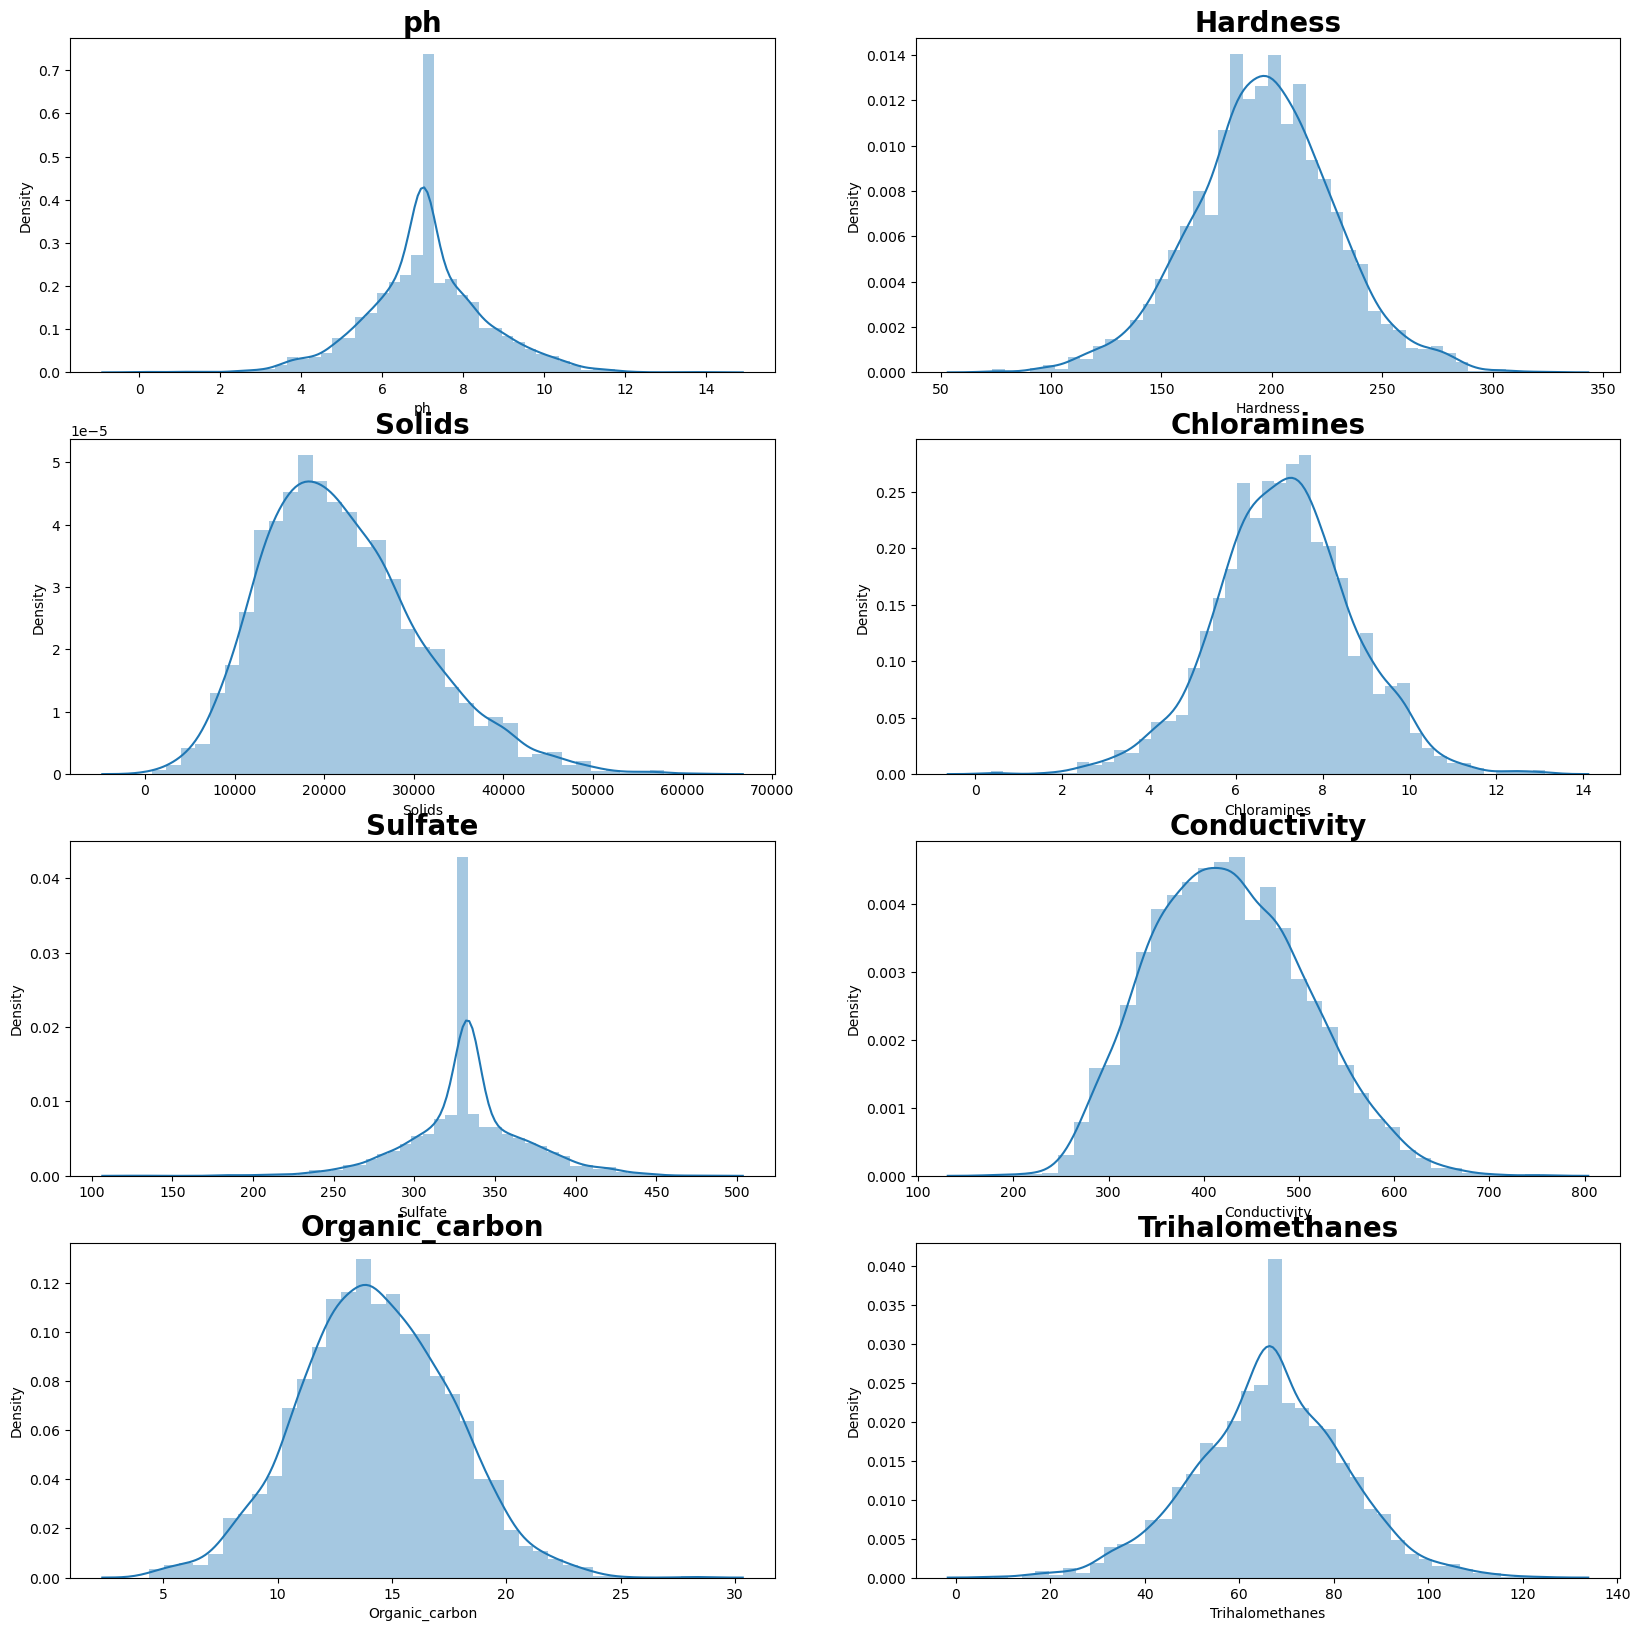

In [55]:
plt.figure(figsize=(20,20))
for i in range(8):
    plt.subplot(4,2,(i%8)+1)
    sns.distplot(train_data[train_data.columns[i]])
    plt.title(train_data.columns[i],fontdict={'size':20,'weight':'bold'},pad=3)
plt.show()

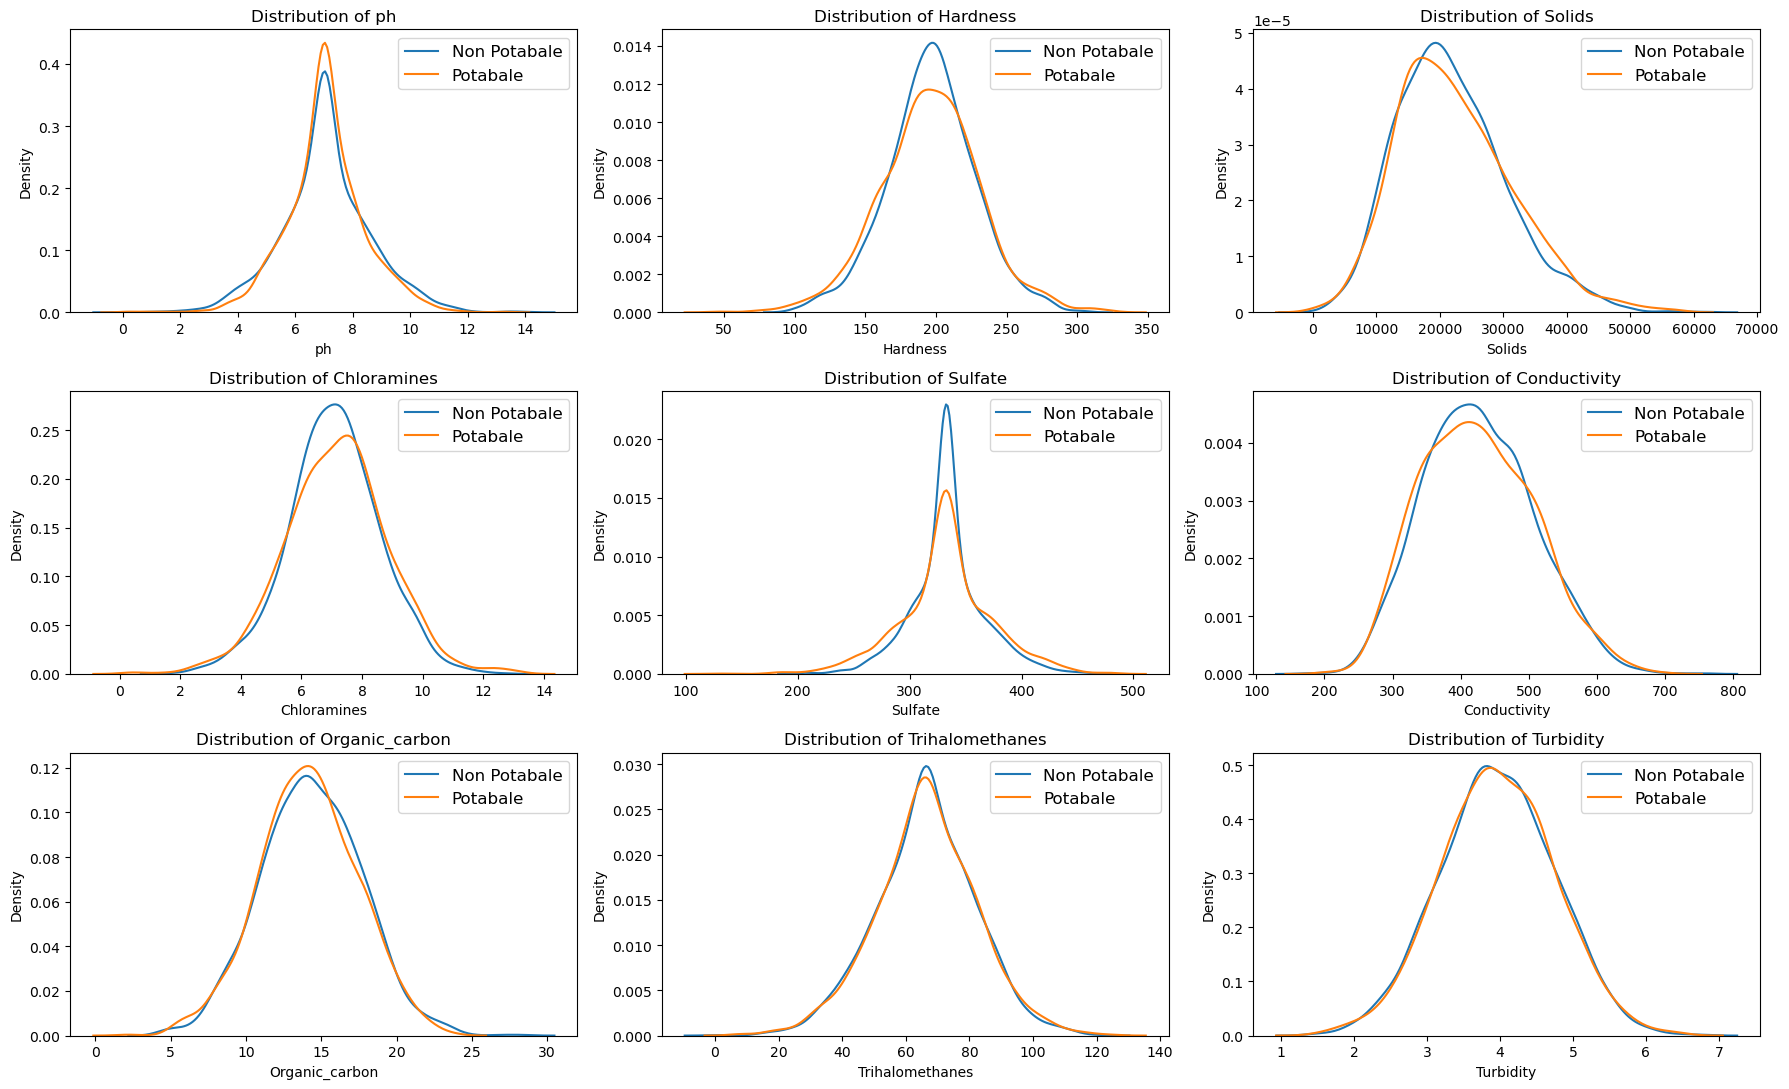

In [56]:
non_potabale = data.query('Potability == 0')
potabale     = data.query('Potability == 1')

for ax,col in enumerate(data.columns[:9]):
    plt.subplot(3,3,ax+1)
    plt.title(f'Distribution of {col}')
    sns.kdeplot(x=non_potabale[col],label='Non Potabale')
    sns.kdeplot(x=potabale[col],label='Potabale')
    plt.legend(prop=dict(size=12))
    
plt.rc('figure',figsize=(18,11))
plt.tight_layout()

In [57]:
#splitting
#train_data,test_data=train_test_split(data,test_size=0.3,random_state=42)

In [58]:
train_inp=train_data.iloc[:,:9]
train_out=train_data.iloc[:,9]
test_inp=test_data.iloc[:,:9]
test_out=test_data.iloc[:,9]

**SCALING DATA**

In [59]:
scaler=MinMaxScaler()
train_x_std=scaler.fit_transform(train_inp)

In [60]:
test_x_std=scaler.transform(test_inp)

In [61]:
models_scores=pd.DataFrame()

training

In [62]:
#dt_model=DecisionTreeClassifier()
#dt_model=GridSearchCV(model_tree,param_grid={'max_depth':range(1,100)})
#dt_model.fit(X_train_scaled, y_train)

#dt_model = DecisionTreeClassifier()
#dt_model.fit(X_train_scaled, y_train)

testing

In [63]:
#dt_test_accuracy = dt_grid.score(X_test_scaled, y_test)
#print("Decision Tree Accuracy : ", ((dt_test_accuracy)*100))

In [64]:
#y_pred = dt_model.predict(X_test_scaled)

In [65]:
#accuracy = accuracy_score(y_test, y_pred)
#precision = precision_score(y_test, y_pred)
#recall = recall_score(y_test, y_pred)
#f1score = f1_score(y_test, y_pred)#

#print("Accuracy = ", accuracy)
#print("Precision = ", precision)
#print("Recall = ", recall)
#print("F1 Score = ", f1score)

# **TRAINING**

DECISION TREE CLASSIFIER ON TRAINING DATA

In [66]:
model_tree=DecisionTreeClassifier()
grid_tree=GridSearchCV(model_tree,param_grid={})
grid_tree.fit(train_inp,train_out)

GridSearchCV(estimator=DecisionTreeClassifier(), param_grid={})

In [67]:
#model_elm=MLPClassifier()
#grid_elm=GridSearchCV(model_elm,param_grid={})
#grid_elm.fit(train_inp,train_out)

# **TESTING**

DECISION TREE CLASSIFIER ON TESTING DATA

In [68]:
tree_acc=accuracy_score(test_out,grid_tree.predict(test_inp))
model_acc=pd.DataFrame({'Model name':['Decision Tree classifier'],'Accuracy':[tree_acc]})
models_scores=models_scores.append(model_acc,ignore_index=True)
grid_tree.best_params_

{}

In [69]:
print('Train report of DecisionTreeClassifier \n',classification_report(train_out,grid_tree.predict(train_inp)))
print("\n")
print('Test report of DecisionTreeClassifier \n',classification_report(test_out,grid_tree.predict(test_inp)))

Train report of DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1586
           1       1.00      1.00      1.00      1034

    accuracy                           1.00      2620
   macro avg       1.00      1.00      1.00      2620
weighted avg       1.00      1.00      1.00      2620



Test report of DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.68      0.64      0.66       412
           1       0.45      0.50      0.47       244

    accuracy                           0.59       656
   macro avg       0.56      0.57      0.56       656
weighted avg       0.59      0.59      0.59       656



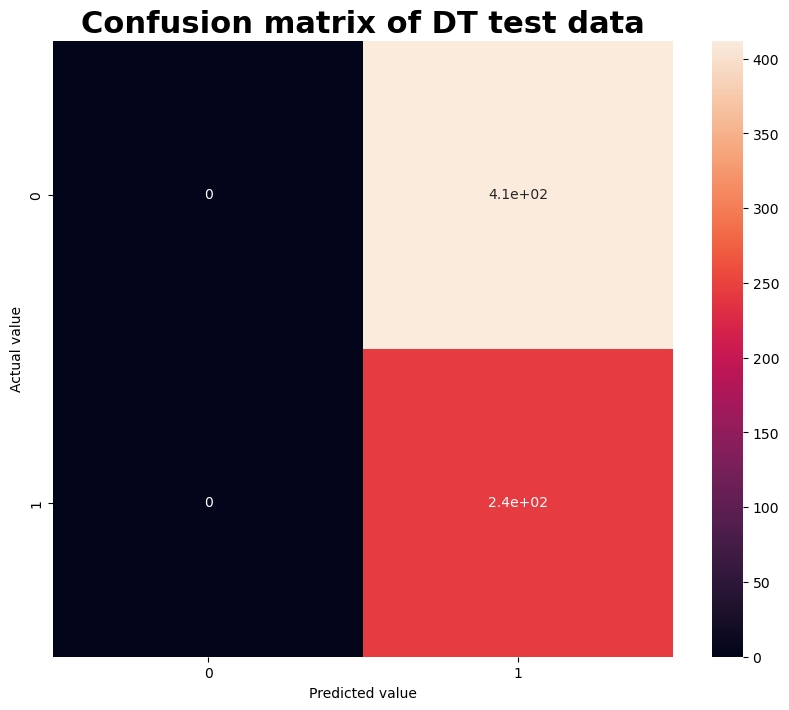

In [70]:

plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(test_out,grid_tree.predict(test_x_std)),annot=True)
plt.title('Confusion matrix of DT test data',fontdict={'size':22,'weight':'bold'})
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.show()

In [71]:
#elm_acc=accuracy_score(test_out,grid_elm.predict(test_inp))
#emodel_acc=pd.DataFrame({'Model name':['Extreme Learning Machine'],'Accuracy':[elm_acc]})
#models_scores=models_scores.append(emodel_acc,ignore_index=True)
#grid_elm.best_params_

In [72]:
model_elm=MLPClassifier()
grid_elm=GridSearchCV(model_elm,param_grid={})
grid_elm.fit(train_inp,train_out)

GridSearchCV(estimator=MLPClassifier(), param_grid={})

In [73]:
elm_acc=accuracy_score(test_out,grid_elm.predict(test_x_std))
model_acc=pd.DataFrame({'Model name':['Extreme Learning Machine'],'Accuracy':[elm_acc]})
models_scores=models_scores.append(model_acc,ignore_index=True)

In [74]:
print('Train report of XGBClassifier \n',classification_report(train_out,grid_elm.predict(train_x_std)))
print('Test report of XGBClassifier \n',classification_report(test_out,grid_elm.predict(test_x_std)))

Train report of XGBClassifier 
               precision    recall  f1-score   support

           0       0.61      1.00      0.75      1586
           1       0.00      0.00      0.00      1034

    accuracy                           0.61      2620
   macro avg       0.30      0.50      0.38      2620
weighted avg       0.37      0.61      0.46      2620

Test report of XGBClassifier 
               precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656



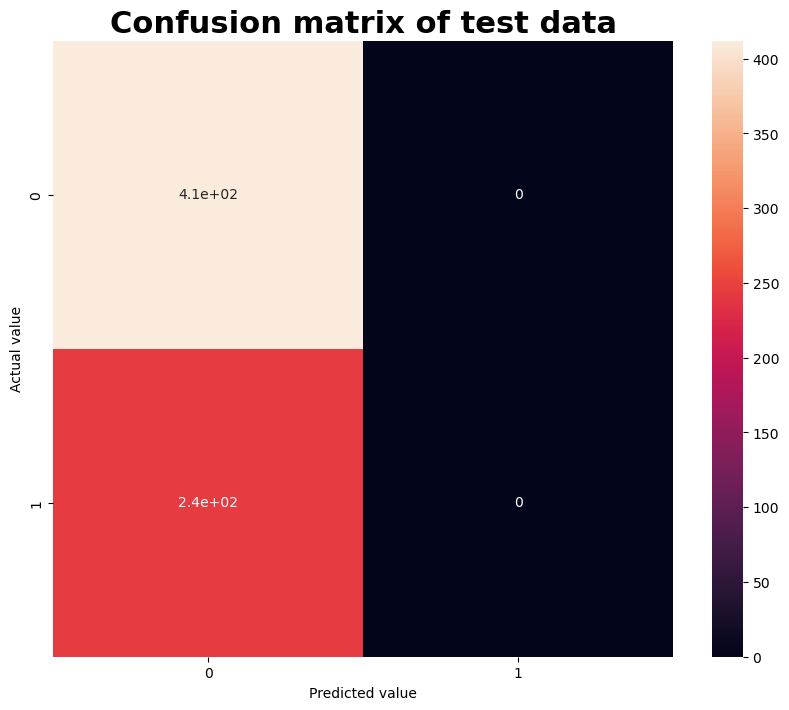

In [75]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(test_out,grid_elm.predict(test_x_std)),annot=True)
plt.title('Confusion matrix of test data',fontdict={'size':22,'weight':'bold'})
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.show()

# COMPARISON OF MODEL ACCURACY

In [76]:
models_scores.sort_values(by=['Accuracy'],ascending=False,ignore_index=True)

,Model name,Accuracy
0,Extreme Learning Machine,0.628049
1,Decision Tree classifier,0.585366
